<center><h1 class="background-title">Workshop 11 - Background<br>SVM</h1></center>

## Support Vector Machines (SVM)

SVM is an algorithm for building a linear binary classifier which is based on the idea for selecting a decision plain which maximized the separation margin between the two classes along the direction of the plains normal.

### Hard SVM

Hard SVM solves the problem of selecting this optimal pain is the case where the two classes are linearly separable. It can be shown that maximizing the separation margin is equivalent to solving the following optimization problem, called the primal problem:
$$
\boldsymbol{w}^*,b^*=\underset{\boldsymbol{w},b}{\arg\min} \frac{1}{2}\left\lVert\boldsymbol{w}\right\rVert^2 \\
\begin{align*}
\text{s.t.}\quad y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right)\geq1\quad&\forall i
\end{align*}
$$

An equivalent form of this equation is the following, which is called the dual problem:
$$
\left\{\alpha_i\right\}^*=\underset{\left\{\alpha_i\right\}}{\arg\max} \sum_i\alpha_i-\frac{1}{2}\sum_{i,j}y_iy_j\alpha_i\alpha_j\left<\boldsymbol{x}_i,\boldsymbol{x}_j\right> \\
\begin{align*}
\text{s.t.}\quad&\alpha_i\geq0\quad&\forall i\\
&\sum_i\alpha_iy_i=0
\end{align*}
$$
Where
$$
\boldsymbol{w}=\sum_i\alpha_iy_i\boldsymbol{x}_i\\
$$

The dual problem highlights a nice property of the solution:

When solving the optimization problem, each point in the training sets will obey one of the following two conditions:
1. $\alpha_i=0$ and $y_i\left(\boldsymbol{w}_i^Tx_i+b\right)>1$
2. $\alpha_i>0$ and $y_i\left(\boldsymbol{w}_i^Tx_i+b\right)=1$

Form the equation $\boldsymbol{w}=\sum_i\alpha_iy_i\boldsymbol{x}_i$, we can conclude that only the points, $\boldsymbol{x}_i$, with $\alpha_i>0$ participate in defining the value of $\boldsymbol{w}$. These points are called the support vectors, and in the general case, their number will be very small.

### Soft SVM

In the case where the classes are not linearly separable, we can use a modified problem by introducing a set of slack variables $\left\{\xi_i\right\}$ which releases the constraint for a perfect classification with a strict margin.

The primal problem is this case will be:
$$
\boldsymbol{w}^*,b^*=\underset{\boldsymbol{w},b}{\arg\min} \frac{1}{2}\left\lVert\boldsymbol{w}\right\rVert^2+C\sum_i\xi_i \\
\begin{align*}
\text{s.t.}\quad &y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right)\geq1-\xi_i\quad&\forall i\\
&\xi_i\geq0\quad&\forall i
\end{align*}
$$

The dual problem is this case will be:

$$
\left\{\alpha_i\right\}^*=\underset{\left\{\alpha_i\right\}}{\arg\max} \sum_i\alpha_i-\frac{1}{2}\sum_{i,j}y_iy_j\alpha_i\alpha_j\left<\boldsymbol{x}_i,\boldsymbol{x}_j\right> \\
\begin{align*}
\text{s.t.}\quad&0\leq\alpha_i\leq C\quad&\forall i\\
&\sum_i\alpha_iy_i=0
\end{align*}
$$
Where
$$
\boldsymbol{w}=\sum_i\alpha_iy_i\boldsymbol{x}_i\\
$$

Here the points in the dataset will obey one of the three following conditions:
1. $\alpha_i=0$ and $y_i\left(\boldsymbol{w}_i^Tx_i+b\right)>1$
2. $C>\alpha_i>0$ and $y_i\left(\boldsymbol{w}_i^Tx_i+b\right)=1$
2. $\alpha_i=C$ and $y_i\left(\boldsymbol{w}_i^Tx_i+b\right)<11$

<center><h1 class="workshop-title">Workshop 11<br>SVM</h1></center>

## Problem: Identify Gender by Voice

In this workshop, we will use SVM to try and identify the gender of a speaker by his voice. One immediate motivation for such a system is to make virtual personal assistants gender aware. An extension to this problem can by be to identify the person's identity according to his voice or his mood etc.

## Dataset Labeled Voices

The idea, along with the data for this workshop, came form the dataset and evaluation performed by Kory Becker, which can be found on her [website](http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/).

According to the project's web page, the 3168 voice samples and their label were collected from the following resources:
- [The Harvard-Haskins Database of Regularly-Timed Speech](http://www.nsi.edu/~ani/download.html)
- [Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University](http://www-mmsp.ece.mcgill.ca/Documents../Data/index.html)
- [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
- [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/)

Each voice track was then processed using a tool called [WarbleR](https://cran.r-project.org/web/packages/warbleR/warbleR.pdf) in order to extract 20 numerical features for each track.

The data itself can be found [here](https://yairomer.github.io/ml_course/datasets/voice.csv).

## 🔃 The Workflow

We will follow the usual work follow to build our digits classifier

<center><img src="../media/diagrams/workflow/workflow_full.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

We will start by loading the data and taking a look at it by printing out the 10 first rows.

In [ ]:
data_file = 'https://yairomer.github.io/ml_course/datasets/voice.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## The Data Fields and Types

The list and descriptions of the data fields as copied from the project's website:

- **meanfreq**: mean frequency (in kHz)
- **sd**: standard deviation of frequency
- **median**: median frequency (in kHz)
- **Q25**: first quantile (in kHz)
- **Q75**: third quantile (in kHz)
- **IQR**: interquantile range (in kHz)
- **skew**: skewness (see note in specprop description)
- **kurt**: kurtosis (see note in specprop description)
- **sp.ent**: spectral entropy
- **sfm**: spectral flatness
- **mode**: mode frequency
- **centroid**: frequency centroid (see specprop)
- **meanfun**: average of fundamental frequency measured across acoustic signal
- **minfun**: minimum fundamental frequency measured across acoustic signal
- **maxfun**: maximum fundamental frequency measured across acoustic signal
- **meandom**: average of dominant frequency measured across acoustic signal
- **mindom**: minimum of dominant frequency measured across acoustic signal
- **maxdom**: maximum of dominant frequency measured across acoustic signal
- **dfrange**: range of dominant frequency measured across acoustic signal
- **modindx**: modulation index. Calculated as the accumulated absolute difference between

- **label**: The label of each track: male/female

###  📉 Some Plots

The number of males and females samples in the dataset. 

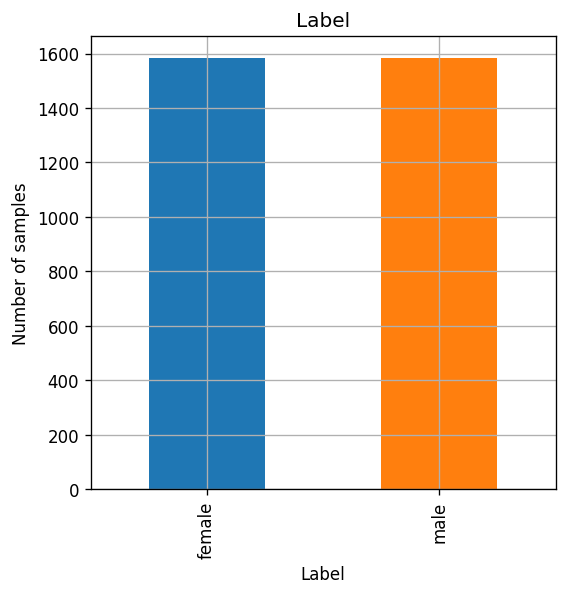

In [ ]:
fig, ax = plt.subplots()
dataset.groupby('label').size().plot.bar(ax=ax)
ax.set_title('Label')
ax.set_xlabel('Label')
ax.set_ylabel('Number of samples');

The distribution of samples of each label as a function of the measured values

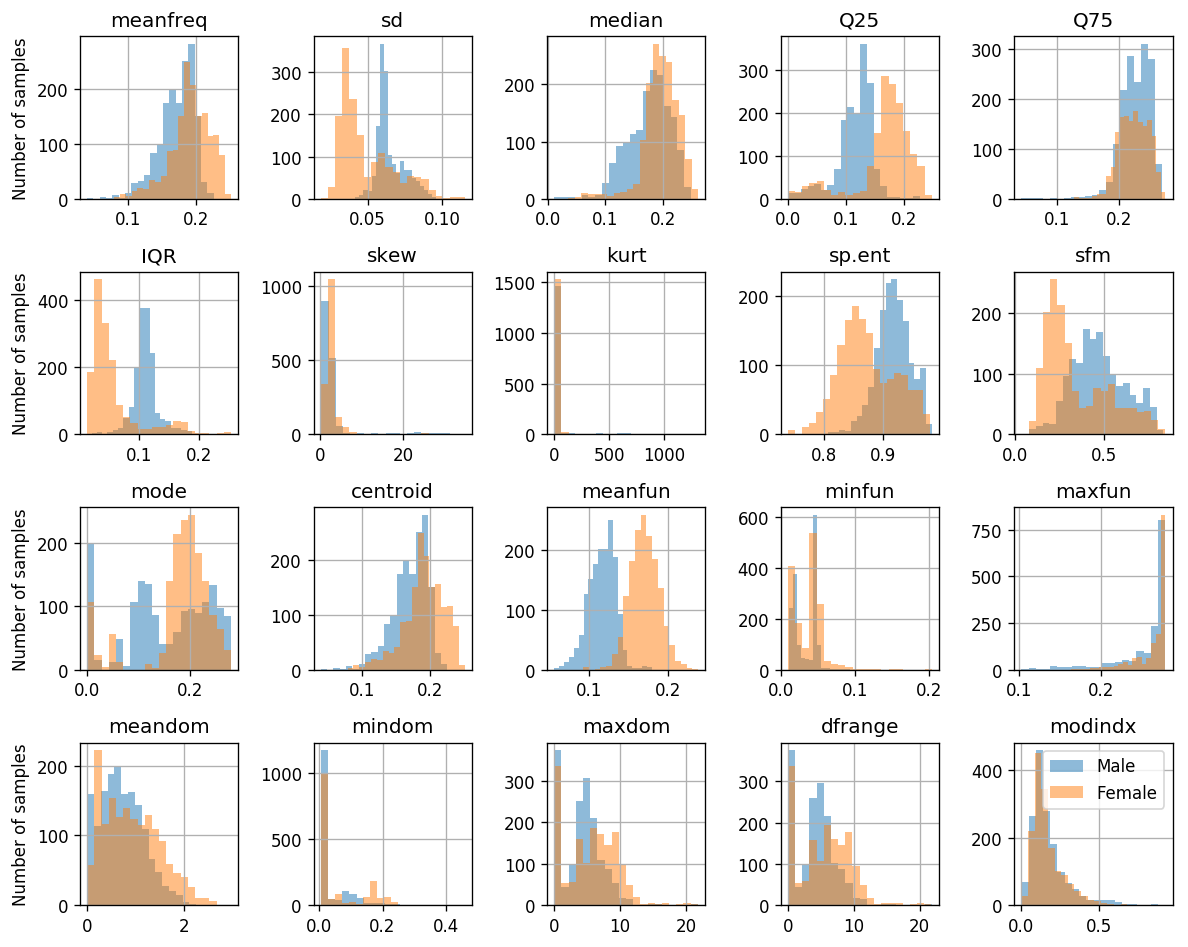

In [ ]:
measuements_columns = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

## Plotting the histograms
fig, ax_list = plt.subplots(4, 5, figsize=(10, 8))
for i, feature in enumerate(measuements_columns):
    ax = ax_list.flat[i]
    ax.hist(dataset.query('label == "male"')[feature].values, bins=20, alpha=0.5, label='Male')
    ax.hist(dataset.query('label == "female"')[feature].values, bins=20, alpha=0.5, label='Female')
    ax.set_title(feature)

for ax_list2 in ax_list:
    ax_list2[0].set_ylabel('Number of samples')
    
ax_list.flat[-1].legend()
plt.tight_layout()

## 📜 Problem Definition

For the following given random system:

- Random sample: $\omega$ - A voice sample.
- Random variables:
  - $\boldsymbol{x}=X\left(\omega\right)$: A list of 20 numeric features extracted for the voice recording.
  - $y=Y\left(\omega\right)$: The gender of the speaker: -1 male & 1 female.

Find a binary discrimination function $\hat{y}=h^*\left(\boldsymbol{x}\right)$ which minimizes the misclassification rate:

$$
h^*=\underset{h}{\arg\min}\ E\left[I\left\{h\left(\boldsymbol{x}\right)\neq y\right\}\right]
$$

## 💡 Model & Learning Method Suggestion: Soft SVM

We will use Soft SVM to build our classifier. We will use the [cvxpy](https://www.cvxpy.org/) convex optimization package for solving the optimization problem.

### Parameters:

Our model's parameters are the $\boldsymbol{w}$ and $b$ parameters which define the separation plain.


### Hyper-parameters

The only hyper-parameter in the soft SVM algorithm is the penalty parameter $C$ of the slack variables.

## Data preprocessing

### 📚 Splitting the dataset

We will split the dataset into 60% train - 20% validation - 20% test.

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_validation = int(n_samples * 0.2)
n_samples_test = n_samples - n_samples_train - n_samples_validation
train_indices = indices[:n_samples_train]
validation_indices = indices[n_samples_train:(n_samples_train + n_samples_validation)]
test_indices = indices[(n_samples_train + n_samples_validation):]

train_set = dataset.iloc[train_indices]
validation_set = dataset.iloc[validation_indices]
test_set = dataset.iloc[test_indices]

In [ ]:
## Extracting the data and labels
x_train = train_set[measuements_columns].values
y_train = (train_set['label'].values == 'female') * 2 - 1

x_val = validation_set[measuements_columns].values
y_val = (validation_set['label'].values == 'female') * 2 - 1

x_test = test_set[measuements_columns].values
y_test = (test_set['label'].values == 'female') * 2 - 1

### Normalizing the Data

In this case, it is important to normalize the data before applying the algorithm to it, mainly because of two reasons:
1. The data describes a variant of different features measured in different units with different scales.
2. Soft SVM tries to minimize a distance based objective in which makes him sensitive to the absolute distance in each direction. For example, if we scale up one of the features by a constant value, we will be giving him extra weight in the objecting function.

We will calculate the normalization parameters on the train set and then apply it to all of the data.

In [ ]:
## Calculating the mean and std
x_mean = x_train.mean(axis=0, keepdims=True)
x_std = x_train.std(axis=0, keepdims=True)

## Normalizing the data
x_train_norm = (x_train - x_mean) / x_std
x_val_norm = (x_val - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std

## ⚙️ Learning - Dual Problem

As stated before, we will use the [cvxpy](https://www.cvxpy.org/) package to define and solve the optimization problem. The exact details of using this package is not important, and we will later use scikit-learn for running the algorithm.

We will solve the dual problem:
$$
\left\{\alpha_i\right\}^*=\underset{\left\{\alpha_i\right\}}{\arg\max} \sum_i\alpha_i-\frac{1}{2}\sum_{i,j}y_iy_j\alpha_i\alpha_j\left<\boldsymbol{x}_i,\boldsymbol{x}_j\right> \\
\begin{align*}
\text{s.t.}\quad&0\leq\alpha_i\leq C\quad&\forall i\\
&\sum_i\alpha_iy_i=0
\end{align*}
$$

We will start with $C=1$, and will later try to fine tune it.

In [ ]:
import cvxpy as cp

## Defining C
c = 1.

n_features = x_train_norm.shape[1]

## Defining the variables
alpha = cp.Variable(n_samples_train)

# Create the list of constraints
constraints = []
for i in range(len(x_train_norm)):
    constraints.append(alpha[i] >= 0)
    constraints.append(alpha[i] <= c)

constraints.append(y_train.T * alpha == 0)

## Define the objective
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, (x_train_norm @ x_train_norm.T) * (y_train[:, None] * y_train[None, :])))

## Defining and solving the optimization problem
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)

status: optimal


**Remark**: note that this is not the most efficient way to solve this optimization problem, but it will do for now.

Let us examine the result we got. We shell start by plotting the values of the $\alpha_i$'s for each $i$:

Text(0, 0.5, '$\\alpha$')

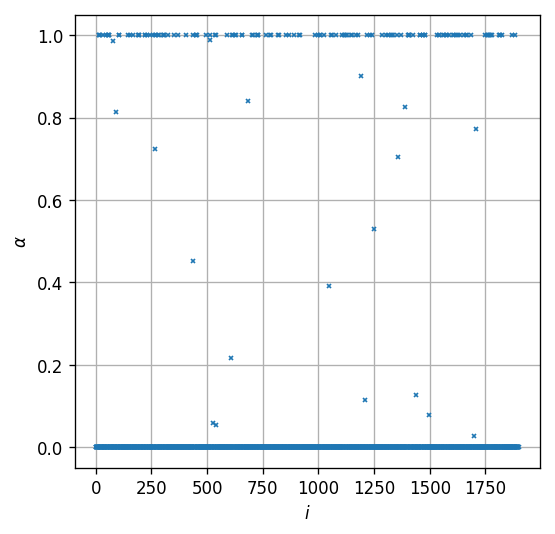

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(n_samples_train), alpha.value, 'x', markersize=2);
ax.set_xlabel('$i$')
ax.set_ylabel('$\\alpha$')

As expected, we can see that we got 3 types of values: $\alpha_i=0$, $0<\alpha_i<C$ and $\alpha_i=C$. These three types should correspond to the following three cases:
- $\alpha_i=0$: Points that are correctly classified and are far from the margin: $y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right) > 1$
- $0<\alpha_i<C$: Points which sit right on the margin: $y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right) = 1$
- $\alpha_i=C$: Points which are either miss-classified (on the wrong side of the separation plain) or correctly classified but sit within the margin: $y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right) < 1$

Let us continue to calculate $\boldsymbol{w}$ and $b$. We can calculate $\boldsymbol{w}$ by:
$$
\boldsymbol{w}=\sum_i\alpha_iy_i\boldsymbol{x}_i
$$
And then calculate $b$ by picking one of the points for which $0<\alpha_i<C$ and use: $y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right) = 1$.

In [ ]:
w = (alpha.value * y_train) @ x_train_norm
i = np.where((alpha.value > 0.1) & (alpha.value < 0.9))[0][0]
b = y_train[i] - w @ x_train_norm[i]

Let us plot the histogram of the classification rule $\boldsymbol{w}^T\boldsymbol{x}+b$ for all point and color them according the three classes we have described above:

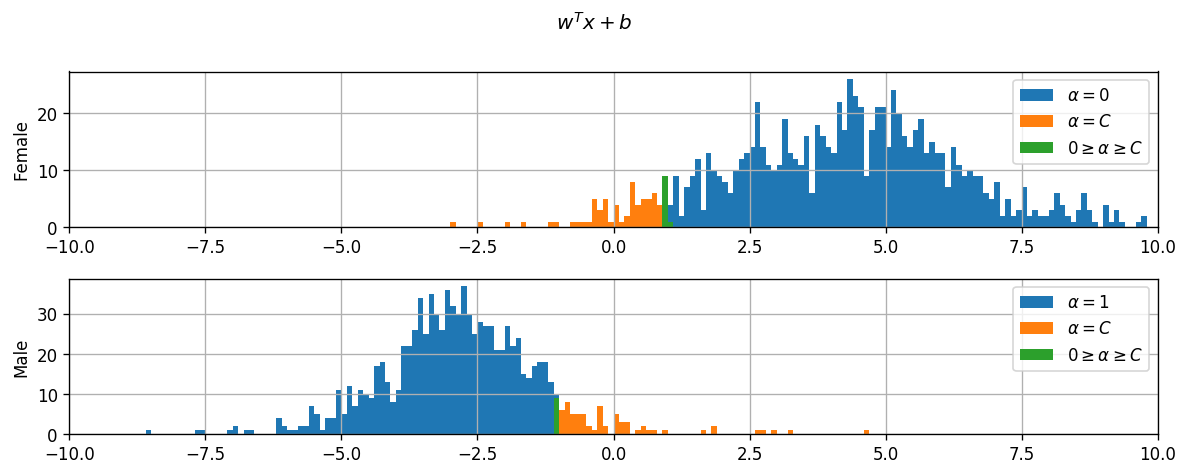

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4))
type1 = alpha.value < 0.001
type2 = (alpha.value >= 0.001) & (alpha.value <= 0.999)
type3 = alpha.value >= 0.999

ax1.set_ylabel('Female')
ax1.hist(x_train_norm[(y_train==1) & type1] @ w + b, np.arange(-10, 10, 0.1), label='$\\alpha=0$')
ax1.hist(x_train_norm[(y_train==1) & type3] @ w + b, np.arange(-10, 10, 0.1), label='$\\alpha=C$')
ax1.hist(x_train_norm[(y_train==1) & type2] @ w + b, np.arange(-10, 10, 0.1), label='$0\\geq\\alpha\\geq C$')

ax2.set_ylabel('Male')
ax2.hist(x_train_norm[(y_train==-1) & type1] @ w + b, np.arange(-10, 10, 0.1), label='$\\alpha=1$')
ax2.hist(x_train_norm[(y_train==-1) & type3] @ w + b, np.arange(-10, 10, 0.1), label='$\\alpha=C$')
ax2.hist(x_train_norm[(y_train==-1) & type2] @ w + b, np.arange(-10, 10, 0.1), label='$0\\geq\\alpha\\geq C$')

ax1.set_xlim(-10, 10)
ax2.set_xlim(-10, 10)
ax1.legend()
ax2.legend()
fig.suptitle('$w^Tx+b$')
plt.tight_layout(rect=[0, 0, 1, 0.9])

We can see that indeed, females are assigned with positive values and males with negative. Let us evaluate the performance of the classifier

## ⏱️ Performance evaluation

Let us calculate the risk on the test set

In [ ]:
predictions = ((x_test_norm @ w + b) > 0) * 2 - 1
test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.3}$'.format(test_risk))

## ⚙️ Learning - Primal Problem

Just as an exercise let us also solve the primal problem and compare the results:

$$
\boldsymbol{w}^*,b^*=\underset{\boldsymbol{w},b}{\arg\min} \frac{1}{2}\left\lVert\boldsymbol{w}\right\rVert^2+C\sum_i\xi_i \\
\begin{align*}
\text{s.t.}\quad &y_i\left(\boldsymbol{w}^T\boldsymbol{x}_i+b\right)\geq1-\xi_i\quad&\forall i\\
&\xi_i\geq0\quad&\forall i
\end{align*}
$$

In [ ]:
## Defining the variables
w2 = cp.Variable(n_features)
xi = cp.Variable(n_samples_train)
b2 = cp.Variable()

# Create the list of constraints
constraints = []
for i in range(len(x_train_norm)):
    constraints.append(y_train[i] * (w2.T * x_train_norm[i] + b2) >= 1 - xi[i])
    constraints.append(xi[i] >= 0)

## Define the objective
objective = cp.Minimize(0.5 * cp.sum(w2 ** 2) + 1. * cp.sum(xi))

## Defining and solving the optimizatino problem
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)

status: optimal


In [ ]:
print('The fist 10 values if w in the primal problem are:')
print(w2.value[:5])
print('The fist 10 values if w in the dual problem are:')
print(w[:5])
print()
print('The b value of the primal problem is: {}'.format(b2.value))
print('The b value of the dual problem is: {}'.format(b))

The fist 10 values if w in the primal problem are:
[ 0.32403667 -0.13227075 -0.06096529  0.41782102 -0.48840472]
The fist 10 values if w in the dual problem are:
[ 0.32138073 -0.13206916 -0.05900207  0.4178552  -0.48799808]

The b value of the primal problem is: 0.6602256435596877
The b value of the dual problem is: 0.658170109096357


## ⚙️ Learning - sklearn.svm.SVC

We can use the [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) object from scikit-learn to build an SVM classifier. Two arguments of this object which are worth mentioning are:
- **C**: The penalty parameter for the slack variables.
- **kernel**: The kernel which will be used to build the classifier. 'linear' will result in the plain SVM classifier.

In [ ]:
from sklearn.svm import SVC

## Create the SVC object
svc = SVC(C = 1.0, kernel='linear')

## Run the learning algorithm
svc.fit(x_train_norm, y_train)

## Evaluate in the test set
predictions = svc.predict(x_test_norm)
test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.3}$'.format(test_risk))

## Hyper-Parameter Adjustment

We will now turn to adjust the hyper-parameter $C$. We will test our results against the validation set for values in the range of $10^{-3}$ - $10^3$.

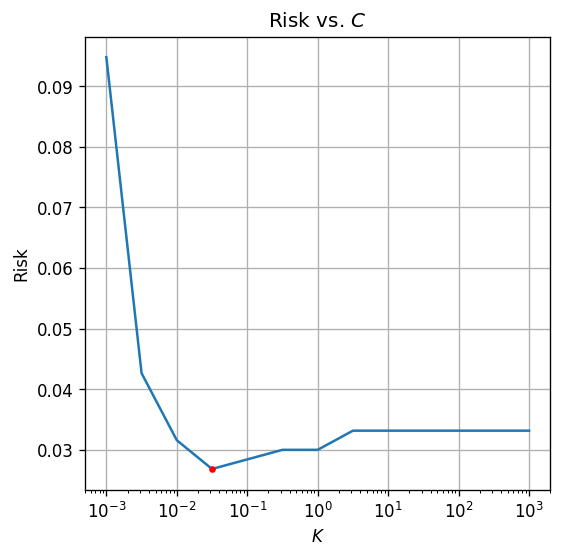

In [ ]:
## Define the list of C values to test
c_list = np.logspace(-3, 3, 13)

risk_array = np.zeros((len(c_list), ))

## Train and evaluate the algorithm for each C
for i_c, c in enumerate(c_list):
    svc = SVC(C=c, kernel='linear')
    svc.fit(x_train_norm, y_train)
    
    predictions = svc.predict(x_val_norm)
    risk_array[i_c] = (y_val != predictions).mean()

## Extract the optimal C value
optimal_index = np.argmin(risk_array)
optimal_c = c_list[optimal_index]

print_math('The optimal $C$ is ${}$'.format(optimal_c))

## Re-learn and evalute the model with the optimal C
svc = SVC(C = optimal_c, kernel='linear')
svc.fit(x_train_norm, y_train)
predictions = svc.predict(x_test_norm)
test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

## PLot risk vs. C
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(c_list, risk_array)
ax.plot(optimal_c, risk_array[optimal_index], '.r')
ax.set_xlabel('$K$')
ax.set_ylabel('Risk')
ax.set_title('Risk vs. $C$');

by selecting a more optimal $C$ we were able to improve our results for $0.02$ to $0.017$.

## Using kernels

As was described in the lecture, by using the dual problem formulation, we can replace the $\left<\boldsymbol{x}_i,\boldsymbol{x}_j\right>$ in the objective with an arbitrary kernel. We will not elaborate about the subject here, but you can see below a slight improvement we can get by using a popular kernel called Radial Basis Function (RBF)

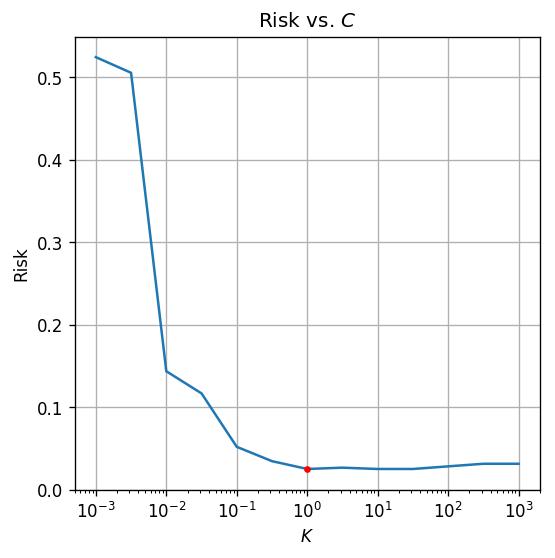

In [ ]:
## Train and evaluate the algorithm for each C
for i_c, c in enumerate(c_list):
    svc = SVC(C=c, kernel='rbf', gamma=0.01)
    svc.fit(x_train_norm, y_train)
    
    predictions = svc.predict(x_val_norm)
    risk_array[i_c] = (y_val != predictions).mean()

## Extract the optimal C value
optimal_index = np.argmin(risk_array)
optimal_c = c_list[optimal_index]

print_math('The optimal $C$ is ${}$'.format(optimal_c))

## Re-learn and evalute the model with the optimal C
svc = SVC(C = optimal_c, kernel='rbf')
svc.fit(x_train_norm, y_train)
predictions = svc.predict(x_test_norm)
test_risk = (y_test != predictions).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

## PLot risk vs. C
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(c_list, risk_array)
ax.plot(optimal_c, risk_array[optimal_index], '.r')
ax.set_xlabel('$K$')
ax.set_ylabel('Risk')
ax.set_title('Risk vs. $C$');

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->